# Advanced usage

## Rep to intensity maps

### The built-in maps

In [1]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import the available mappings
from streprogen import (reps_to_intensity, 
                        reps_to_intensity_relaxed, 
                        reps_to_intensity_tight)

# Set up repetitions and apply all three mappings
reps = list(range(1, 12 + 1))
intensities_norm = list(map(reps_to_intensity, reps))
intensities_relaxed = list(map(reps_to_intensity_relaxed, reps))
intensities_tight = list(map(reps_to_intensity_tight, reps))

### Plotting the maps

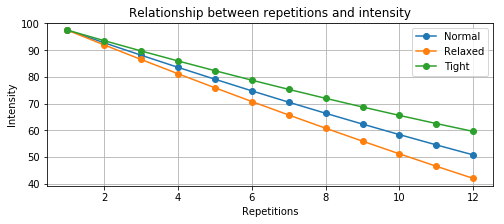

In [2]:
plt.figure(figsize = (8, 3))
plt.title('Relationship between repetitions and intensity')
plt.plot(reps, intensities_norm, '-o', label = 'Normal')
plt.plot(reps, intensities_relaxed, '-o', label = 'Relaxed')
plt.plot(reps, intensities_tight, '-o', label = 'Tight')
plt.ylabel('Intensity')
plt.xlabel('Repetitions')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

As seen above, 1 repetition is always mapped to 97.5% of the maximum value for a specific week (we prefer to be conservative and not go to 100% in training programs, leave that for competitions and max-days).

### Tabulating maps

In [3]:
(int_n, int_r, int_t) = (intensities_norm, 
                         intensities_relaxed, 
                         intensities_tight)

tw = 6 # Table width
print('reps'.ljust(8),*[str(i).ljust(tw) for i in reps])
print('-'*90)
print('normal'.ljust(8), *[str(round(i)).ljust(tw) for i in int_n])
print('relaxed'.ljust(8),*[str(round(i)).ljust(tw) for i in int_r])
print('tight'.ljust(8),*[str(round(i)).ljust(tw) for i in int_t])

reps     1      2      3      4      5      6      7      8      9      10     11     12    
------------------------------------------------------------------------------------------
normal   98     93     88     84     79     75     70     66     62     58     54     51    
relaxed  98     92     86     81     76     71     66     61     56     51     46     42    
tight    98     94     90     86     82     79     75     72     69     66     62     60    


### User defined maps

If the supplied maps are not sufficient for the usecase, the user is welcome to create their own. Two natural ways to do this is by:

1. Using a partial function, i.e. "subclassing" a function.
2. Defining ones own function from scratch.

In [4]:
from functools import partial

# Method 1: Using a partial function
# This creates a new function and sets the
# 'slope' and 'constant arguments'
custom_set_intensity = partial(reps_to_intensity, 
                               slope=-4.4, constant=90)
intensities_custom = list(map(custom_set_intensity, reps))

# Method 2: Custom function from scratch
def custom_set_intensity(reps):
    return 97.5 - 8 *(reps - 1) + 0.33*(reps - 1)**2

intensities_custom2 = list(map(custom_set_intensity, reps))

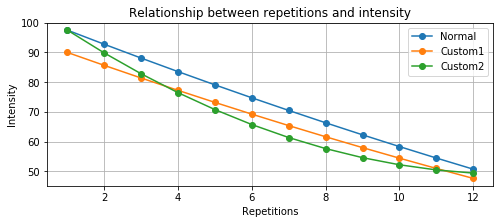

In [5]:
plt.figure(figsize = (8, 3))
plt.title('Relationship between repetitions and intensity')
plt.plot(reps, intensities_norm, '-o', label = 'Normal')
plt.plot(reps, intensities_custom, '-o', label = 'Custom1')
plt.plot(reps, intensities_custom2, '-o', label = 'Custom2')
plt.ylabel('Intensity')
plt.xlabel('Repetitions')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

## Progression models

In [6]:
from streprogen import progression_linear, progression_sinusoidal

# Set up some constants
duration = 8
start, end = 100, 120

# Create lists
weeks = list(range(1, duration + 1))
weight_linear = [progression_linear(week, start, end, 1, duration)
                 for week in weeks]
weight_sine = [progression_sinusoidal(week, start, end, 1, duration)
               for week in weeks]

### Plotting the models

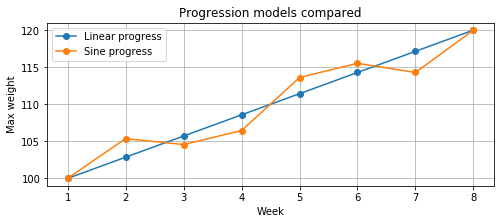

In [7]:
plt.figure(figsize = (8, 3))
plt.title('Progression models compared')
plt.plot(weeks, weight_linear, '-o', label = 'Linear progress')
plt.plot(weeks, weight_sine, '-o', label = 'Sine progress')
plt.ylabel('Max weight')
plt.xlabel('Week')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

The `periods` and `scale` arguments may be used.

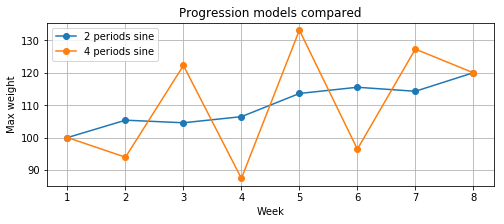

In [8]:
weight_sine2 = [progression_sinusoidal(week, start, end, 1, duration,
               periods = 4, scale = 0.2) for week in weeks]

plt.figure(figsize = (8, 3))
plt.title('Progression models compared')
plt.plot(weeks, weight_sine, '-o', label = '2 periods sine')
plt.plot(weeks, weight_sine2, '-o', label = '4 periods sine')
plt.ylabel('Max weight')
plt.xlabel('Week')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

## Scale reps and intensities

In [9]:
duration = 12

# A function to create scalers for the repetitions and itensity
reps_func      = partial(progression_sinusoidal, 
                    start_weight = 1.1,  final_weight = 0.9,  
                    start_week = 1, end_week = duration, 
                    periods=3, scale=0.25, offset=2)

intensity_func = partial(progression_sinusoidal, 
                    start_weight = 0.95, final_weight = 1.05, 
                    start_week = 1, end_week = duration, 
                    periods=3, scale=0.04, offset=0)

# Create lists
weeks = list(range(1, duration + 1))
intensity_scalers = list(map(intensity_func, weeks))
reps_scalers = list(map(reps_func, weeks))

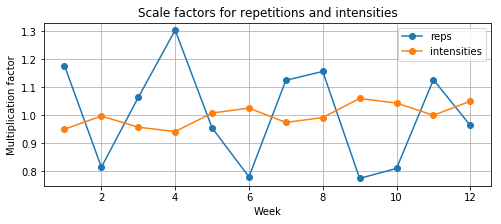

In [10]:
plt.figure(figsize = (8, 3))
plt.title('Scale factors for repetitions and intensities')
plt.plot(weeks, reps_scalers, 'o-', label = 'reps')
plt.plot(weeks, intensity_scalers, 'o-', label = 'intensities')
plt.ylabel('Multiplication factor')
plt.xlabel('Week')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()